In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [2]:
ops.reset_default_graph()

In [3]:
np.random.seed(42)
tf.set_random_seed(42)
sess = tf.Session()

In [4]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [5]:
train_indices = np.random.choice(len(x_vals),
                                round(len(x_vals)*0.8),
                                replace=False)#replace = False)

In [6]:
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [7]:
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [8]:
batch_size = 120

In [9]:
x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [10]:
A = tf.Variable(tf.random_normal(shape = [2, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [11]:
####################################################################
# Declare loss function
# Loss = max(0, 1-pred * actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha

model_output = tf.subtract(tf.matmul(x_data, A), b)#

l2_norm =  tf.reduce_sum(tf.square(A))#

alpha = tf.constant([0.01])

classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
####################################################################

In [12]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [13]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [14]:
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
loss_vec = []
train_accuracy = []
test_accuracy = []

In [16]:
for i in range(500):
    rand_index = np.random.choice( len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict = {
        x_data: x_vals_train,
        y_target : np.transpose([y_vals_train]) })
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])    })
    test_accuracy.append(test_acc_temp)
    
    if(i+1) % 100 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = '+str(temp_loss))

Step #100 A = [[ 0.39967626]
 [-2.62079334]], b = [[ 0.18049823]]
Loss = [ 0.12077285]
Step #200 A = [[ 0.39387468]
 [-2.61386871]], b = [[ 0.1731649]]
Loss = [ 0.09857223]
Step #300 A = [[ 0.38906321]
 [-2.60797668]], b = [[ 0.16524827]]
Loss = [ 0.12168951]
Step #400 A = [[ 0.38899034]
 [-2.60084271]], b = [[ 0.15624832]]
Loss = [ 0.0918275]
Step #500 A = [[ 0.38665223]
 [-2.59627342]], b = [[ 0.14758159]]
Loss = [ 0.11340417]


In [17]:
#Extract coefficients
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

#Extract x1 and x2 vals
x1_vals = [d[1] for d in x_vals]

#Get best fit line
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i + y_intercept)

#Separate I. setosa
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i ,d in enumerate(x_vals) if y_vals[i] == -1]

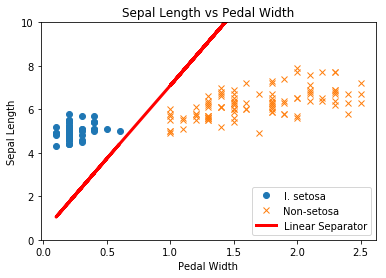

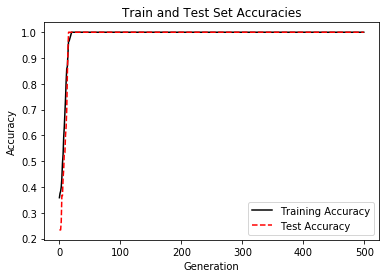

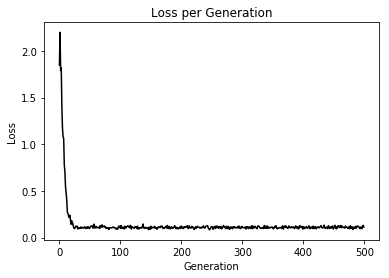

In [18]:
%matplotlib inline
#Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label = 'I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label = 'Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth = 3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

#Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [19]:
#similar dataset test

Step #100 A = [[ 1.77211785]
 [-1.28050768]], b = [[ 0.03041491]]
Loss = [ 0.66974813]
Step #200 A = [[ 1.61884284]
 [-1.16441953]], b = [[ 0.0461649]]
Loss = [ 0.62314379]
Step #300 A = [[ 1.46432102]
 [-1.0630331 ]], b = [[ 0.0624149]]
Loss = [ 0.52709037]
Step #400 A = [[ 1.30408227]
 [-0.96837825]], b = [[ 0.07974824]]
Loss = [ 0.63818181]
Step #500 A = [[ 1.19083273]
 [-0.84463298]], b = [[ 0.09358157]]
Loss = [ 0.66254157]


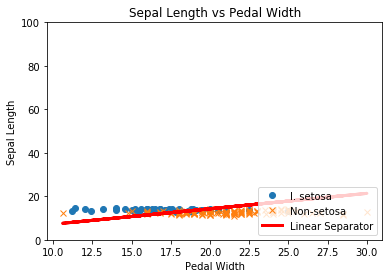

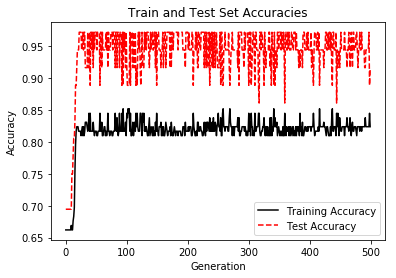

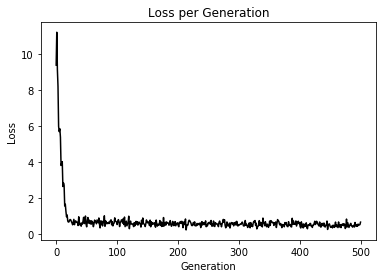

In [20]:
ops.reset_default_graph()
np.random.seed(42)
tf.set_random_seed(42)
sess = tf.Session()

iris = datasets.load_wine()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

train_indices = np.random.choice(len(x_vals),
                                round(len(x_vals)*0.8),
                                replace=False)#replace = False)

test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

batch_size = 120

x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

A = tf.Variable(tf.random_normal(shape = [2, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

####################################################################
# Declare loss function
# Loss = max(0, 1-pred * actual) + alpha * L2_norm(A)^2
# L2 regularization parameter, alpha

model_output = tf.subtract(tf.matmul(x_data, A), b)#

l2_norm =  tf.reduce_sum(tf.square(A))#

alpha = tf.constant([0.01])

classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))
####################################################################

prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
train_accuracy = []
test_accuracy = []

for i in range(500):
    rand_index = np.random.choice( len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict = {
        x_data: x_vals_train,
        y_target : np.transpose([y_vals_train]) })
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={
        x_data: x_vals_test,
        y_target: np.transpose([y_vals_test])    })
    test_accuracy.append(test_acc_temp)
    
    if(i+1) % 100 == 0:
        print('Step #{} A = {}, b = {}'.format(
            str(i+1),
            str(sess.run(A)),
            str(sess.run(b))
        ))
        print('Loss = '+str(temp_loss))

#Extract coefficients
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

#Extract x1 and x2 vals
x1_vals = [d[1] for d in x_vals]

#Get best fit line
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i + y_intercept)

#Separate I. setosa
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i ,d in enumerate(x_vals) if y_vals[i] == -1]

%matplotlib inline
#Plot data and line
plt.plot(setosa_x, setosa_y, 'o', label = 'I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label = 'Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth = 3)
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

#Plot train/test accuracies
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()